In [56]:
from qiskit import *
import matplotlib as mp
from qiskit.tools.visualization import plot_histogram

In [57]:
input = QuantumRegister(2)
qr = QuantumRegister(2)
carry = ClassicalRegister(1)
sum = ClassicalRegister(1)
circuit = QuantumCircuit(input,qr,sum,carry)

In [58]:
#defining a function to add the qubits
def add(circuit,input,qr,carry,sum):
  circuit.h(input[0])
  circuit.cx(input[0],qr[1])
  circuit.cx(input[1],qr[1])
  circuit.ccx(input[0],input[1],qr[0])
  circuit.measure(qr[0],carry)
  circuit.measure(qr[1], sum)

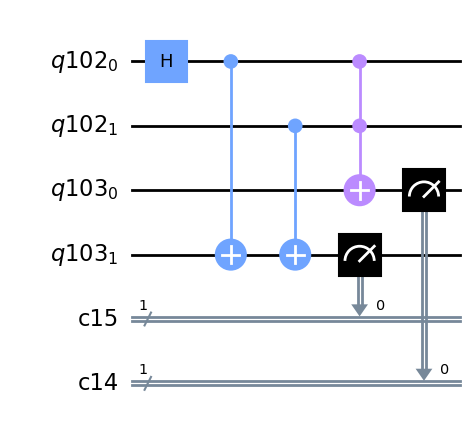

In [59]:
#circuit with initial inputs 0, 0
add(circuit,input,qr,carry,sum)
circuit.draw(output='mpl')

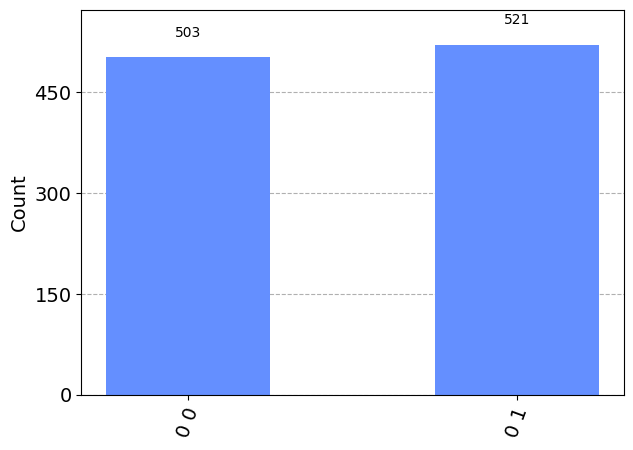

In [60]:
#inputs are either (0,0) or (1,0) with equal probability, hence giving the sum to be 00 or 01 with almost 50% probability of each

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))


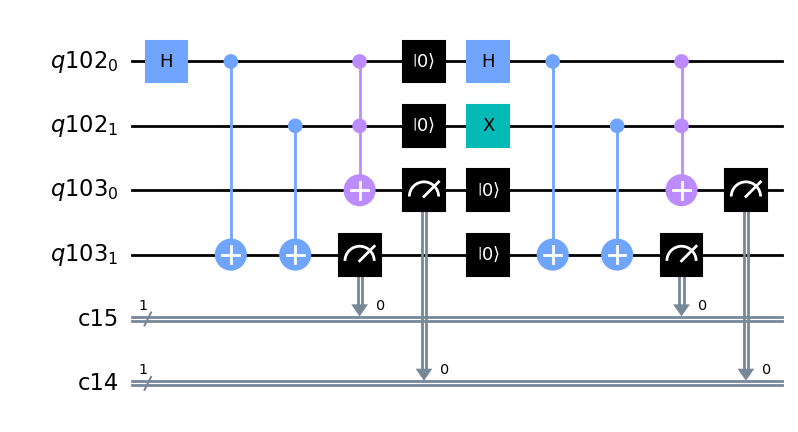

In [61]:
#circuit with initial inputs 0, 1
circuit.reset(qr)
circuit.reset(input)
circuit.x(input[1])
add(circuit,input,qr,carry,sum)
circuit.draw(output='mpl')

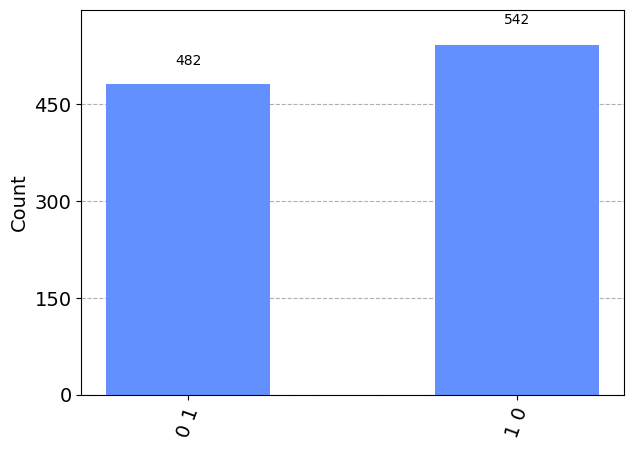

In [62]:
#inputs are either (0,1) or (1,1) with equal probability, hence giving the sum to be 01 or 10 with almost 50% probability of each

result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))


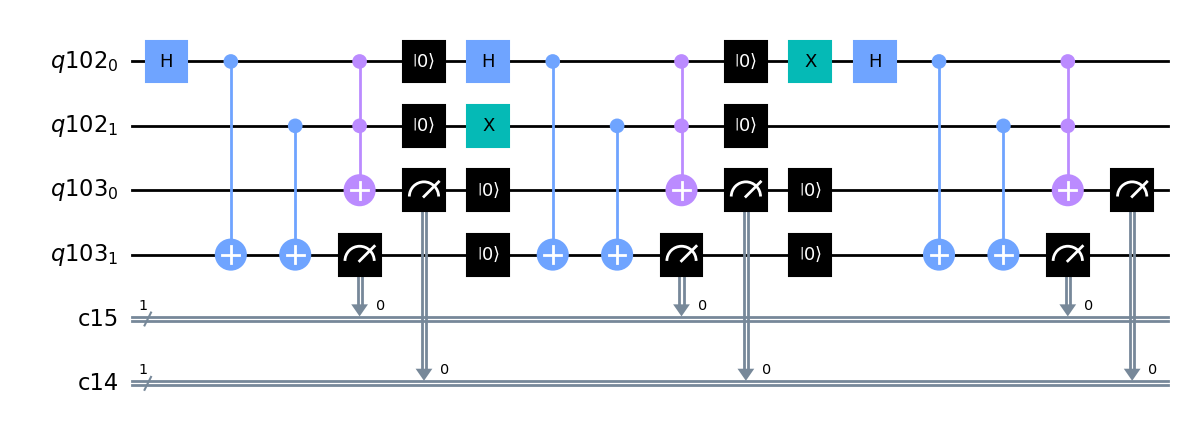

In [63]:
#circuit with initial inputs 1,0
circuit.reset(qr)
circuit.reset(input)
circuit.x(input[0])

add(circuit,input,qr,carry,sum)
circuit.draw(output='mpl')

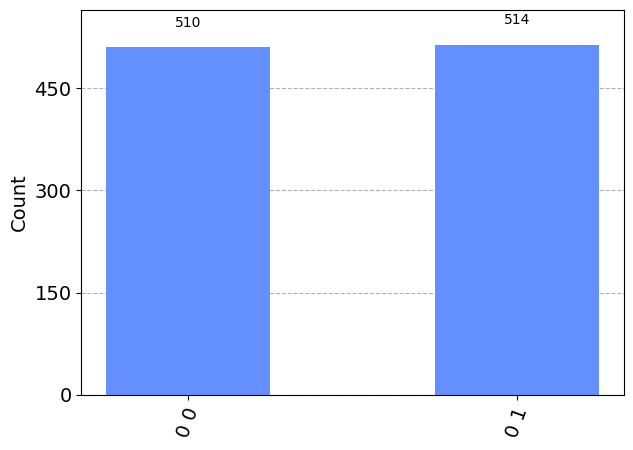

In [64]:
#inputs are either (1,0) or (0,0) with equal probability, hence giving the sum to be 00 or 01 with almost 50% probability of each
#this graph is identical to that of case one due to application of H gate
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))


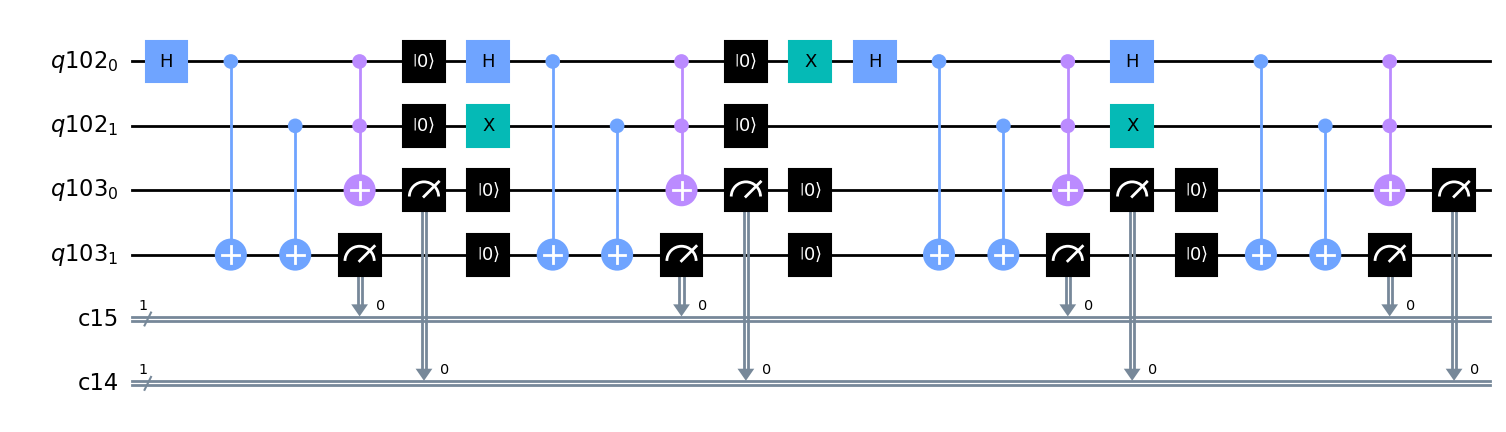

In [65]:
#circuit with initial inputs 1,1
circuit.x(input[1])
circuit.reset(qr)
add(circuit,input,qr,carry,sum)
circuit.draw(output='mpl')

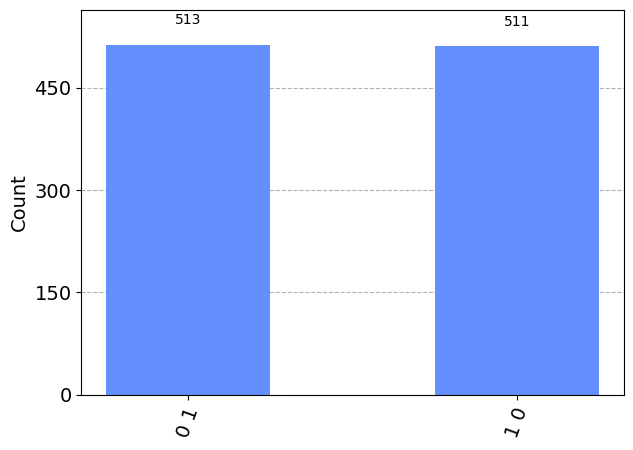

In [66]:
#inputs are either (1,0) or (1,1) with equal probability, hence giving the sum to be 01 or 10 with almost 50% probability of each
#identical to case two
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))